In [1]:
import os 
#if you want to know current working dir
os.getcwd()
#if you want to change
os.chdir('/Users/xinyuhuangmac/Google Drive/M1S2/rp/wordle')

# Introduction
 Dans ce projet, on s'intéresse à modéliser le jeu wordle mind en appliquant les méthodes de satisfaction de contraintes et un algorithme génétique

# CSP
- a1
- a2
- algo probabiliste
- algo triche

In [1]:
from constraint import *
import numpy as np
from copy import deepcopy

def readfile(file):
    lines=[]
    dic_file=dict()
    with open(file) as f:
        for line in f:
            word=[i for i in line.rstrip()]
            lg_word=len(word)
            if lg_word in dic_file:
                dic_file[lg_word].append(word)
            else:
                dic_file[lg_word]=[word]
    return dic_file


def check_correct(instance, word):
    bien_place=0
    mal_place=0
    list_not_match1=[]
    list_not_match2=[]
    for i in range(len(instance)):
        if instance[i]==word[i]:
            bien_place+=1
        else:
            list_not_match1.append(instance[i])
            list_not_match2.append(word[i])
    for letter in list_not_match1:
        if letter in list_not_match2:
            list_not_match2.remove(letter)
            mal_place+=1
    return bien_place, mal_place



def solver_a1(word, list_mot, list_domain,render=0):
    n=len(word)
    pb=Problem()


    for i in range(n):
        name_variable=str(i)
        pb.addVariables(name_variable,list_domain[i])

    solutions=deepcopy(list_mot)
    bien_place=1
    index=np.random.randint(solutions.shape[0])
    solution=solutions[index]
    bien_place, mal_place = check_correct(solution, word )
    solutions=np.array([ solutions[i] for i in range(solutions.shape[0] ) if i!=index])
    counter=1
    true_count=0
    if render==0:
        print("Word to guess: ",word)
        print(counter, solution, word, bien_place, mal_place )
    while bien_place<n:
        counter+=1
        if bien_place==0:
            for i in range(n):
                if solution[i] in pb._variables[str(i)]:
                    pb._variables[str(i)].remove(solution[i])
                    solutions=solutions[np.where(solutions[:,i]!=solution[i])]

        index=np.random.randint(len(solutions))
        solution=solutions[index]
        solutions=np.array([solutions[i] for i in range(len(solutions) ) if i!=index])
        bien_place, mal_place = check_correct(solution, word)
        if render==0:
            print(counter, solution, word, bien_place, mal_place )
    return counter

def solver_a2(word, list_mot, list_domain,render=0):
    n=len(word)
    pb=Problem()

    for i in range(n):
        name_variable=str(i)
        pb.addVariables(name_variable,list_domain[i])

    solutions=deepcopy(list_mot)
    bien_place=1
    index=np.random.randint(solutions.shape[0])
    solution=solutions[index]

    bien_place, mal_place = check_correct(solution, word )
    solutions=np.array([ solutions[i] for i in range(solutions.shape[0] ) if i!=index])
    counter=1
    if render==0:
        print("Word to guess: ",word)
        print(counter, solution, word, bien_place, mal_place )
    while bien_place<n:
        counter+=1
        if bien_place==0:
            if mal_place==0:
                for i in range(n):
                    for j in range(n):
                        if solution[i] in pb._variables[str(j)]:
                            pb._variables[str(j)].remove(solution[i])
                            solutions=solutions[np.where(solutions[:,j]!=solution[i])]
            else:
                for i in range(n):
                    if solution[i] in pb._variables[str(i)]:
                        pb._variables[str(i)].remove(solution[i])
                        solutions=solutions[np.where(solutions[:,i]!=solution[i])]

        index=np.random.randint(len(solutions))
        solution=solutions[index]
        solutions=np.array([solutions[i] for i in range(len(solutions) ) if i!=index])
        bien_place, mal_place = check_correct(solution, word)
        if render==0:
            print(counter, solution, word, bien_place, mal_place )

    return counter


def generate_probabiliste_dict(list_mot, n):
    nb_dict=dict()
    pb_dict=dict()
    total=len(list_mot)
    for i in range(n):
        nb_dict[i]=dict()
    for mot in list_mot:
        for i in range(n):
            letter=mot[i]
            if letter in nb_dict[i]:
                nb=nb_dict[i][letter]
                nb_dict[i][letter]=nb+1
            else:
                nb_dict[i][letter]=1
    for index, mot in enumerate(list_mot):
        #print( np.log(np.prod([ nb_dict[i][mot[i]]/total for i in range(n)])))
        #print()
        pb_dict[index]=np.sum([ np.log(nb_dict[i][mot[i]]/total) for i in range(n)])
    return pb_dict




def solver_csp_probabiliste(word, list_mot, list_domain, render=0):
    n=len(word)
    pb=Problem()


    for i in range(n):
        name_variable=str(i)
        pb.addVariables(name_variable,list_domain[i])

    solutions=deepcopy(list_mot)
    bien_place=1

    pb_dict=generate_probabiliste_dict(list_mot, n)
    index=max(pb_dict, key=pb_dict.get)
    solution=solutions[index]

    bien_place, mal_place = check_correct(solution, word )
    solutions=np.array([ solutions[i] for i in range(solutions.shape[0] ) if i!=index])
    counter=1
    if render==0:
        print("Word to guess: ",word)
        print(counter, solution, word, bien_place, mal_place )
    while bien_place<n:
        counter+=1
        change=0
        if bien_place==0:
            change=1
            if mal_place==0:
                for i in range(n):
                    for j in range(n):
                        if solution[i] in pb._variables[str(j)]:
                            pb._variables[str(j)].remove(solution[i])
                            solutions=solutions[np.where(solutions[:,j]!=solution[i])]
            else:
                for i in range(n):
                    if solution[i] in pb._variables[str(i)]:
                        pb._variables[str(i)].remove(solution[i])
                        solutions=solutions[np.where(solutions[:,i]!=solution[i])]
        if change==1:
            pb_dict=generate_probabiliste_dict(solutions, n)
            index=max(pb_dict, key=pb_dict.get)
        else:
            index=np.random.randint(len(solutions))
        solution=solutions[index]
        solutions=np.array([solutions[i] for i in range(len(solutions) ) if i!=index])
        bien_place, mal_place = check_correct(solution, word)
        if render==0:
            print(counter, solution, word, bien_place, mal_place )
    return counter

def solver_triche(word, list_mot, list_domain, render=0):
    def find_bien_place(solution, n, count_bien, list_index, word):
        counter=0
        for i in range(n):
            if i not in list_index:
                avant=solution[i]
                solution[i]="_"
                bien_place_new,_ =check_correct(solution, word)
                counter+=1
                if bien_place_new<count_bien:

                    solution[i]=avant
                    return i,counter
        print("Erreur : func_find_bien_place")

    def correct_mal_place(solution, n, count_bien, count_mal, list_index, word):
        counter=0
        for i in range(n):
            if i not in list_index:
                for j in range(n):
                    if j not in list_index:
                        temp=solution[j]
                        solution[j]=solution[i]
                        counter+=1
                        bien_place_new, mal_place_new =check_correct(solution, word)
                        if bien_place_new>count_bien :#and <count_mal:
                            #count_mal=mal_place_new
                            #print(solution, word,i,j)
                            #print(temp,j, "here")
                            return j,bien_place_new,mal_place_new,counter
                        solution[j]=temp
    n=len(word)
    pb=Problem()
    solutions=deepcopy(list_mot)
    for i in range(n):
        name_variable=str(i)
        pb.addVariables(name_variable,list_domain)

    index=np.random.randint(len(solutions))
    solution=solutions[index]
    solutions=np.array([ solutions[i] for i in range(solutions.shape[0] ) if i!=index])
    counter=1
    bien_fix=0
    list_index=[]

    bien_place=0
    while bien_place<n:

        bien_place, mal_place = check_correct(solution, word)
        if bien_place==0:
            if mal_place==0:
                for i in range(n):
                    for j in range(n):
                        if solution[i] in pb._variables[str(j)]:
                            pb._variables[str(j)].remove(solution[i])
                            solutions=solutions[np.where(solutions[:,j]!=solution[i])]
            else:
                for i in range(n):
                    if solution[i] in pb._variables[str(i)]:
                        pb._variables[str(i)].remove(solution[i])
                        solutions=solutions[np.where(solutions[:,i]!=solution[i])]
        if bien_place==n:
            if render==0:
                print(counter, solution, word, bien_place, mal_place )
            break

        while bien_place>bien_fix:
            ind,count=find_bien_place(solution, n, bien_place, list_index, word)
            list_index.append(ind)
            solutions=solutions[np.where(solutions[:,ind]==solution[ind])]
            counter+=count
            bien_fix+=1
        bien_place, mal_place = check_correct(solution, word)
        if bien_place==n:
            if render==0:
                print(counter, solution, word, bien_place, mal_place )
            break
        while mal_place>0:
            j,bien_place,mal_place_new,count=correct_mal_place(solution, n, bien_place, mal_place,list_index, word)
            list_index.append(j)
            bien_fix+=1
            solutions=solutions[np.where(solutions[:,j]==solution[j])]
            counter+=count
            mal_place=mal_place_new
        index=np.random.randint(len(solutions))
        solution=solutions[index]
        solutions=np.array([ solutions[i] for i in range(solutions.shape[0] ) if i!=index])
        bien_place, mal_place = check_correct(solution, word)
        counter+=1
        if render==0:
            print(counter, solution, word, bien_place, mal_place )
    return counter

In [2]:
dictionnary=readfile('./dico.txt')
import time
import matplotlib.pyplot as plt

In [17]:
list_t1,list_t2=[],[]
list_iter1,list_iter2=[],[]
for n in range(2,10):
    list_mot=np.array(dictionnary[n])
    list_domain=[list(set(np.array(list_mot)[:,i] )) for i in range(n) ]
    sl_iter1,sl_iter2=[],[]
    sl_t1, sl_t2=[],[]
    print("n = ",n)
    for i in range(50):
        
        word=list_mot[np.random.randint(list_mot.shape[0])]
        start = time.time()
        sl_iter1.append(solver_a1(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t1.append(stop-start)
                        
        start = time.time()
        sl_iter2.append(solver_a2(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t2.append(stop-start)
        #print("============Word ",i+1,"Found===============")
    list_iter1.append(np.mean(sl_iter1))
    list_iter2.append(np.mean(sl_iter2))
    list_t1.append(np.mean(sl_t1))
    list_t2.append(np.mean(sl_t2))

n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9


## Comparer a1 et a2

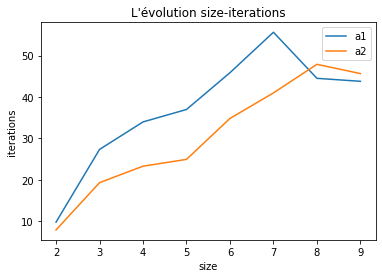

In [18]:
n_range=[i for i in range(2,(9+1))]
plt.plot(n_range,list_iter1, label="a1")
plt.plot(n_range,list_iter2, label="a2")
plt.title("L'évolution size-iterations")
plt.xlabel("size")
plt.ylabel("iterations")
plt.legend()
plt.show()

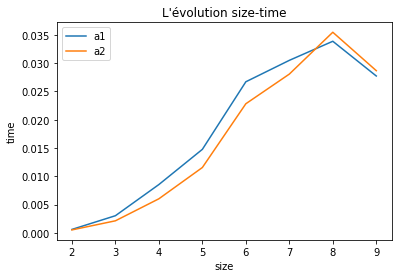

In [19]:
n_range=[i for i in range(2,(9+1))]
plt.plot(n_range,list_t1, label="a1")
plt.plot(n_range,list_t2, label="a2")
plt.title("L'évolution size-time")
plt.xlabel("size")
plt.ylabel("time")
plt.legend()
plt.show()

In [9]:
list_t1,list_t2=[],[]
list_iter1,list_iter2=[],[]
nb_word=np.min([len(dictionnary[n]) for n in range(4,10)])
for n in range(4,10):
    di=deepcopy(dictionnary[n])
    np.random.shuffle(di)
    list_mot=np.array(di[:nb_word])
    list_domain=[list(set(np.array(list_mot)[:,i] )) for i in range(n) ]
    sl_iter1,sl_iter2=[],[]
    sl_t1, sl_t2=[],[]
    print("n = ",n)
    for i in range(200):
        
        word=list_mot[np.random.randint(list_mot.shape[0])]
        start = time.time()
        sl_iter1.append(solver_a1(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t1.append(stop-start)
                        
        start = time.time()
        sl_iter2.append(solver_a2(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t2.append(stop-start)
        #print("============Word ",i+1,"Found===============")
    list_iter1.append(np.mean(sl_iter1))
    list_iter2.append(np.mean(sl_iter2))
    list_t1.append(np.mean(sl_t1))
    list_t2.append(np.mean(sl_t2))

n =  4
n =  5
n =  6
n =  7
n =  8
n =  9


## Comparer a1 et a2 avec nombre de mots égaux

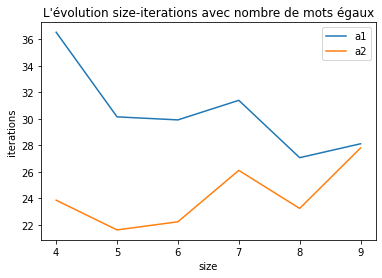

In [10]:
n_range=[i for i in range(4,(9+1))]
plt.plot(n_range,list_iter1, label="a1")
plt.plot(n_range,list_iter2, label="a2")
plt.title("L'évolution size-iterations avec nombre de mots égaux")
plt.xlabel("size")
plt.ylabel("iterations")
plt.legend()
plt.show()

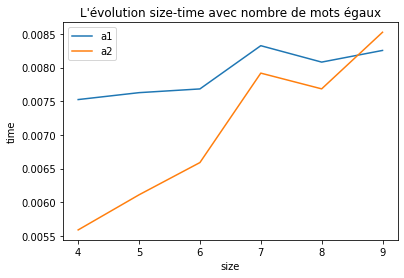

In [11]:
n_range=[i for i in range(4,(9+1))]
plt.plot(n_range,list_t1, label="a1")
plt.plot(n_range,list_t2, label="a2")
plt.title("L'évolution size-time avec nombre de mots égaux")
plt.xlabel("size")
plt.ylabel("time")
plt.legend()
plt.show()

In [14]:
list_t1,list_t2,list_t3=[],[],[]
list_iter1,list_iter2,list_iter3=[],[],[]
for n in range(2,10):
    list_mot=np.array(dictionnary[n])
    list_domain=[list(set(np.array(list_mot)[:,i] )) for i in range(n) ]
    sl_iter1,sl_iter2,sl_iter3=[],[],[]
    sl_t1, sl_t2,sl_t3=[],[],[]
    print("n = ",n)
    for i in range(100):
        
        word=list_mot[np.random.randint(list_mot.shape[0])]
        start = time.time()
        sl_iter1.append(solver_a1(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t1.append(stop-start)
                        
        start = time.time()
        sl_iter2.append(solver_a2(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t2.append(stop-start)
        start = time.time()
        sl_iter3.append(solver_csp_probabiliste(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t3.append(stop-start)
        #print("============Word ",i+1,"Found===============")
    list_iter1.append(np.mean(sl_iter1))
    list_iter2.append(np.mean(sl_iter2))
    list_iter3.append(np.mean(sl_iter3))
    list_t1.append(np.mean(sl_t1))
    list_t2.append(np.mean(sl_t2))
    list_t3.append(np.mean(sl_t3))

n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9


## Comparer a1 a2  et algo probabiliste

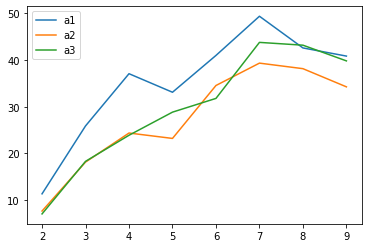

In [15]:
n_range=[i for i in range(2,(10))]
plt.plot(n_range,list_iter1, label="a1")
plt.plot(n_range,list_iter2, label="a2")
plt.plot(n_range,list_iter3, label="a3")
plt.legend()
plt.show()

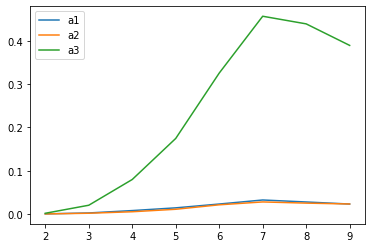

In [16]:
n_range=[i for i in range(2,(10))]
plt.plot(n_range,list_t1, label="a1")
plt.plot(n_range,list_t2, label="a2")
plt.plot(n_range,list_t3, label="a3")
plt.legend()
plt.show()

In [33]:
list_t1,list_t2,list_t3,list_t4=[],[],[],[]
list_iter1,list_iter2,list_iter3,list_iter4=[],[],[],[]
for n in range(2,10):
    list_mot=np.array(dictionnary[n])
    list_domain=[list(set(np.array(list_mot)[:,i] )) for i in range(n) ]
    sl_iter1,sl_iter2,sl_iter3,sl_iter4=[],[],[],[]
    sl_t1, sl_t2,sl_t3,sl_t4=[],[],[],[]
    print("n = ",n)
    for i in range(100):
        
        word=list_mot[np.random.randint(list_mot.shape[0])]
        start = time.time()
        sl_iter1.append(solver_a1(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t1.append(stop-start)
                        
        start = time.time()
        sl_iter2.append(solver_a2(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t2.append(stop-start)
        start = time.time()
        sl_iter3.append(solver_csp_probabiliste(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t3.append(stop-start)
        start = time.time()
        sl_iter4.append(solver_triche(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t4.append(stop-start)
        #print("============Word ",i+1,"Found===============")
    list_iter1.append(np.mean(sl_iter1))
    list_iter2.append(np.mean(sl_iter2))
    list_iter3.append(np.mean(sl_iter3))
    list_iter4.append(np.mean(sl_iter4))
    list_t1.append(np.mean(sl_t1))
    list_t2.append(np.mean(sl_t2))
    list_t3.append(np.mean(sl_t3))
    list_t4.append(np.mean(sl_t4))

n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9


## Comparer a1 a2 algo probabiliste et algo triche

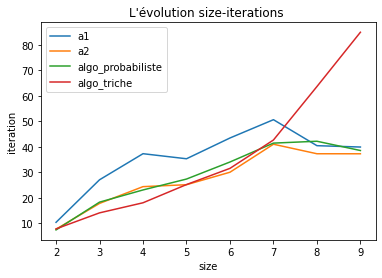

In [38]:
n_range=[i for i in range(2,(10))]
plt.plot(n_range,list_iter1, label="a1")
plt.plot(n_range,list_iter2, label="a2")
plt.plot(n_range,list_iter3, label="algo_probabiliste")
plt.plot(n_range,list_iter4, label="algo_triche")
plt.title("L'évolution size-iterations ")
plt.xlabel("size")
plt.ylabel("iteration")
plt.legend()
plt.show()

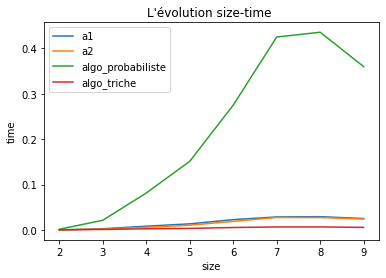

In [39]:
n_range=[i for i in range(2,(10))]
plt.plot(n_range,list_t1, label="a1")
plt.plot(n_range,list_t2, label="a2")
plt.plot(n_range,list_t3, label="algo_probabiliste")
plt.plot(n_range,list_t4, label="algo_triche")
plt.title("L'évolution size-time ")
plt.xlabel("size")
plt.ylabel("time")
plt.legend()
plt.show()

In [40]:
list_t1,list_t2,list_t3,list_t4=[],[],[],[]
list_iter1,list_iter2,list_iter3,list_iter4=[],[],[],[]
for n in range(4,10):
    di=deepcopy(dictionnary[n])
    np.random.shuffle(di)
    list_mot=np.array(di[:nb_word])
    #list_mot=np.array(dictionnary[n])
    list_domain=[list(set(np.array(list_mot)[:,i] )) for i in range(n) ]
    sl_iter1,sl_iter2,sl_iter3,sl_iter4=[],[],[],[]
    sl_t1, sl_t2,sl_t3,sl_t4=[],[],[],[]
    print("n = ",n)
    for i in range(100):
        
        word=list_mot[np.random.randint(list_mot.shape[0])]
        start = time.time()
        sl_iter1.append(solver_a1(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t1.append(stop-start)
                        
        start = time.time()
        sl_iter2.append(solver_a2(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t2.append(stop-start)
        start = time.time()
        sl_iter3.append(solver_csp_probabiliste(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t3.append(stop-start)
        start = time.time()
        sl_iter4.append(solver_triche(word,list_mot,list_domain,render=1))
        stop = time.time()
        sl_t4.append(stop-start)
        #print("============Word ",i+1,"Found===============")
    list_iter1.append(np.mean(sl_iter1))
    list_iter2.append(np.mean(sl_iter2))
    list_iter3.append(np.mean(sl_iter3))
    list_iter4.append(np.mean(sl_iter4))
    list_t1.append(np.mean(sl_t1))
    list_t2.append(np.mean(sl_t2))
    list_t3.append(np.mean(sl_t3))
    list_t4.append(np.mean(sl_t4))

n =  4
n =  5
n =  6
n =  7
n =  8
n =  9


## Comparer a1 a2 algo probabiliste et algo triche avec nombre de mots égaux

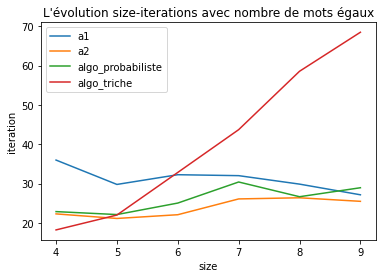

In [41]:
n_range=[i for i in range(4,(10))]
plt.plot(n_range,list_iter1, label="a1")
plt.plot(n_range,list_iter2, label="a2")
plt.plot(n_range,list_iter3, label="algo_probabiliste")
plt.plot(n_range,list_iter4, label="algo_triche")
plt.title("L'évolution size-iterations avec nombre de mots égaux")
plt.xlabel("size")
plt.ylabel("iteration")
plt.legend()
plt.show()

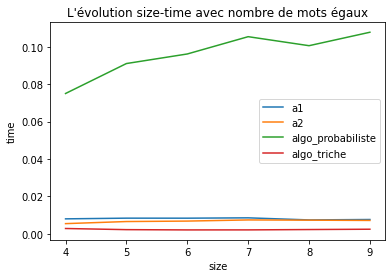

In [42]:
n_range=[i for i in range(4,(10))]
plt.plot(n_range,list_t1, label="a1")
plt.plot(n_range,list_t2, label="a2")
plt.plot(n_range,list_t3, label="algo_probabiliste")
plt.plot(n_range,list_t4, label="algo_triche")
plt.title("L'évolution size-time avec nombre de mots égaux")
plt.xlabel("size")
plt.ylabel("time")
plt.legend()
plt.show()

In [44]:
list_iter2,list_iter3=[],[]
max_l2,max_l3=[],[]
min_l2,min_l3=[],[]
for n in range(4,10):
    di=deepcopy(dictionnary[n])
    np.random.shuffle(di)
    list_mot=np.array(di[:nb_word])
    #list_mot=np.array(dictionnary[n])
    list_domain=[list(set(np.array(list_mot)[:,i] )) for i in range(n) ]
    sl_iter2,sl_iter3=[],[]
    sl_t2,sl_t3=[],[]
    print("n = ",n)
    for i in range(100):
        
        word=list_mot[np.random.randint(list_mot.shape[0])]
 
        sl_iter2.append(solver_a2(word,list_mot,list_domain,render=1))
 
        
        sl_iter3.append(solver_csp_probabiliste(word,list_mot,list_domain,render=1))

 
    max_l2.append(np.max(sl_iter2))
    max_l3.append(np.max(sl_iter3))
    min_l2.append(np.min(sl_iter2))
    min_l3.append(np.min(sl_iter3))
    list_iter2.append(np.mean(sl_iter2))
    list_iter3.append(np.mean(sl_iter3))
    



n =  4
n =  5
n =  6
n =  7
n =  8
n =  9


## Comparer a2 a3 par max et min

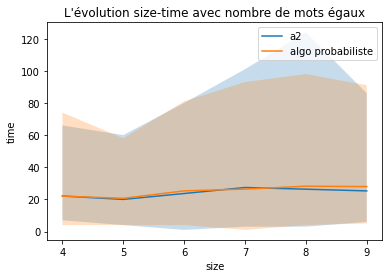

In [48]:
n_range=[i for i in range(4,(10))]
plt.plot(n_range,list_iter2, label="a2")
plt.fill_between(n_range, max_l2,min_l2, alpha=0.25, linewidth=0,)
plt.plot(n_range,list_iter3, label="algo probabiliste")


plt.fill_between(n_range, max_l3,min_l3, alpha=0.25, linewidth=0,)


plt.title("L'évolution size-time avec nombre de mots égaux")
plt.xlabel("size")
plt.ylabel("time")
plt.legend()
plt.show()

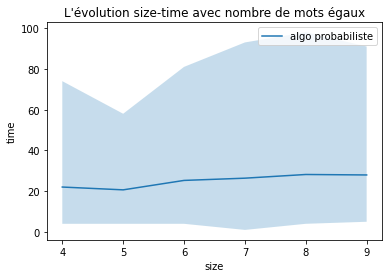

In [47]:
n_range=[i for i in range(4,(10))]
plt.plot(n_range,list_iter3, label="algo probabiliste")
plt.fill_between(n_range, max_l3,min_l3, alpha=0.25, linewidth=0,)
plt.xlabel("size")
plt.ylabel("time")
plt.legend()
plt.show()

In [1]:
#!/usr/bin/env python
# coding: utf-8

from constraint import *
import numpy as np
import string, random
import copy
import time


###### Partie 1 : Prepare list_domaine
def readfile(file):
    lines=[]
    dic_file=dict()
    with open(file) as f:
        for line in f:
            #print(line.rstrip())
            word=list(line.rstrip())#.split('')
            lg_word=len(word)
            if lg_word in dic_file:
                dic_file[lg_word].append(word)
            else:
                dic_file[lg_word]=[word]
    return dic_file

def check_correct(instance, word):
    bien_place=0
    mal_place=0
    list_not_match1=[]
    list_not_match2=[]
    for i in range(len(instance)):
        if instance[i]==word[i]:
            bien_place+=1
        else:
            list_not_match1.append(instance[i])
            list_not_match2.append(word[i])
    for letter in list_not_match1:
        if letter in list_not_match2:
            list_not_match2.remove(letter)
            mal_place+=1
    return bien_place, mal_place

def dict_to_liste_solution(solution , n):
    l=[]
    for i in range(n):
        l.append(solution["x"+str(i)])
    return l

dictionnary=readfile('./dico.txt')
#print(dictionnary[4])

#assert((check_correct("tarte","dette"))==(2,1))
#assert((check_correct("bonjour","nobjour")==(5,2)))

def find_bien_place(solution, n, bien_place, list_index, word):
    for i in range(n):
        if i not in list_index:
            avant=solution[i]
            solution[i]="_"
            bien_place_new,_ =check_correct(solution, word)
            if bien_place_new<bien_place:
                solution[i]=avant
                return i
    print("Erreur : func_find_bien_place")

###### Partie 2 : algorithme genetique
# 
# evaluation_distance✅
# fitness [可能可以优化]
# selection ✅
# mutation_aleatoire✅
# mutation_echange ✅
# mutation_inverse ✅
# croisement ✅
# 
# 

def evaluation_distance(str1,str2):
    '''
        calcul distance d'edition 计算两个字符串间的需要编辑的距离
        fitness = 1 - mot non bien place/len(mot)  需要更改的字母数/总字母数
    '''
    n = str1.__len__()
    distance = np.zeros((n+1,n+1))

    for i in range(0,n+1):
        distance[i,0] = i
        distance[0,i] = i
    
    for i in range(1, n+1):
        for j in range(1,n+1):
            if str1[i-1] == str2[j-1]:
                cost = 0
            else:
                cost = 1
            distance[i,j] = min(distance[i-1,j]+1,distance[i,j-1]+1,distance[i-1,j-1]+cost)
    
    return distance[n,n]

def fitness(solution,word):
    return 1- evaluation_distance(solution,word)/len(word)

def mutation(solution,p_mutation_alea,p_mutation_echange,p_mutation_inverse):
    p = np.random.random()
    n = len(solution)
    #print('valuer p',p)
    new_solution = []
    if p<p_mutation_alea:
        #print('mutation  : alea')
        new_solution = aleatoire(solution)
    if p>p_mutation_alea and p<p_mutation_echange:
        #print('mutation  : echange')
        new_solution = echange(solution)
    if p>p_mutation_echange and p < p_mutation_inverse:
        #print('mutation  : inverse')
        new_solution = inverse(solution)
    else: 
        new_solution = solution
    return new_solution

def aleatoire(str):
    new_str = []
    n = len(str)
    #print('lenth',n)
    pos = random.randint(0,n-1)
    #print(pos)
    l = random.choice(string.ascii_lowercase)
    #print(l)
    #str[pos] = l 
    part_1 = list(str[0:pos])
    part_2 = list(str[pos+1:])
    new_str = part_1+list(l)+part_2
    new_str = ''.join(new_str)
    #print('new str =', new_str)
    return new_str

def echange(str):
    n = len(str)
    str = list(str)
    #print(n)
    pos1 = np.random.randint(0,n)
    pos2 = np.random.randint(0,n)
    pos1,pos2 = min(pos1,pos2),max(pos1,pos2)
    #print(pos1,pos2)
    str[pos1],str[pos2] = str[pos2],str[pos1]
    #new_str = str[0:pos1]+str[pos2]+str[pos1+1:pos2]+str[pos1]+str[pos2+1:]
    #print(new_str)
    new_str = ''.join(str)
    #print('new str =', new_str)
    return new_str

def inverse(str):
    str = list(str)
    #print(len(str))
    left = random.randint(0,len(str)-1)
    right = random.randint(left,len(str)-1)
    #print(left,right)
    while left < right:
        str[left], str[right] = str[right], str[left]
        left += 1
        right -= 1
    #print(str)
    new_str = ''.join(str)
    #print(new_str)
    return new_str


nb_selecte = 1

def selection(word,parents,nb = nb_selecte):
#或者用somme cumulee也可以
    l_fitness = {}
    select_value = []
    for i in range(len(parents)):
        l_fitness[parents[i]] = fitness(parents[i],word)
    #print('list fitness',l_fitness)
    value_list = []
    for key,value in l_fitness.items():
        v = int(value * 100)
        value_list += v*[key]
    #print('value_list',value_list)
    if value_list == []: 
        #print('null')
        value_list = parents
    for i in range(nb):
        select_value.append(random.choice(value_list))
    return select_value




def croisement_fonde(p1, p2, p=-1):
    p1,p2 = list(p1),list(p2)
    if p==-1:
        p=np.random.randint(len(p1))
    f1=p1[:p]
    p2_new=p2
    p2_new=[i for i in p2_new if i not in f1]
    f1=f1+p2_new
    f2=p2[:p]
    p1_new=p1
    p1_new=[i for i in p1_new if (i not in f2)]
    f2=f2+p1_new
    return f1,f2



# longeur : la longeur de mot secret 
# _mu : nombre de parent
# _lambda : nombre de fils
# population initiale

def algo_genetique(word,_mu,_lambda,p_mutation_alea=0.25,p_mutation_echange=0.5,p_mutation_inverse = 0.75):
    '''
    Etant donnée une population d'individus E avec fitness > 0
    il s'agit de prendre les '_mu' meilleurs avec une propabilite propotionnelle à fitness , puis de créer _lambda enfants. 
    Chaque enfant aura pour parent l'un des _mu parents (sélectionné propotionnelle a fitness).
    La population E à la génération suivante sera ajouter les enfants.
    '''
    nb_essais = 0
    start = time.time()
    runtime = 0
    parents = []
    longeur = len(word)
    list_mot=np.array(dictionnary[longeur])
    list_domain=[set(list_mot[:,i]) for i in range(longeur)]
    #for i in range(longeur):
    #    print(len(list_domain[i]))

    #for i in range(len(list_domain)):
        #print('len domain before ',len(list_domain[i]))
    # generate parents

    for j in range(_mu):
        p1 = [a for a in range(longeur)]
        for i in range(longeur):
            #print('variable ',i)
            p1[i] = random.sample(list_domain[i],1)    
            p1[i] = ''.join(p1[i])
        p2 = ''.join(p1)
        #print('p2',p2)
        #print('parents before while',parents)
        #print('tmp',tmp,'p1',p1)
        while fitness(p2,word) == 0 or p2 in parents:
            #print('while ')
            nb_essais += 1
            if fitness(p2,word) == 0 :
                #print('fitness 0',p2 )
                for i in range(longeur):
                    list_domain[i].remove(p1[i])
                    p1[i] = random.sample(list_domain[i],1)
                    p1[i] = ''.join(p1[i])
            elif(p2 in parents): 
                #print('p2 in parents',p2)
                for i in range(longeur):
                    p1[i] = random.sample(list_domain[i],1)
                    p1[i] = ''.join(p1[i])   
            p2 = ''.join(p1)
            #print('p1',p1)
            #print(p1 in parents)
        #print('---------p1',p1)
        p2 = p1
        p2 = ''.join(p2)
        #print('---------p2 jion',p2)
        tmp = copy.deepcopy(''.join(p1))
        parents.append(tmp)
        #print(parents)
        #print(list_domain)
        #for i in range(len(list_domain)):
            #print('list domain',len(list_domain[i]),list_domain[i])   

        if word in parents:
            print('trouve!')
            break
    print('--------------generation finish, parents: ',parents)
    #return parents,fitness

    #generate fils
    nb_generation = 0
    while (word not in parents) and (nb_generation < MAXGEN) and (runtime < MAXTIME) and (len(parents) < MAXSIZE):
    #for k in range(nb_generation):
        #print('-----------------generation',nb_generation)
        nb_generation += 1
        for i in range(_lambda):
            #print('iteration', i)
            select_p1 = selection(word,parents,1)
            #print('select p1',select_p1)
            select_p1 = ''.join(select_p1)
            #print('mutation p1',select_p1)
            select_p1 = mutation(select_p1,p_mutation_alea,p_mutation_echange,p_mutation_inverse)
            if (fitness(select_p1,word))==0:
                nb_essais += 1
                select_change = list(select_p1)
                for i in range(longeur):
                    if select_change[i] in list_domain[i]:
                        list_domain[i].remove(select_change[i])
                        select_change[i] = random.sample(list_domain[i],1)
                        select_change[i] = ''.join(select_p1[i])
            elif(select_p1 in parents):
                nb_essais += 1
                #print('select_change in parents',select_p1)
                select_change = list(select_p1)
                for i in range(longeur):
                    select_change[i] = random.sample(list_domain[i],1)
                    select_change[i] = ''.join(select_change[i])   
            else: 
                parents.append(select_p1)
            #print('new parents',parents)
        end = time.time()
        runtime = end - start
        print(runtime)


        #for i in range(len(list_domain)):
            #print('list domain',len(list_domain[i]),list_domain[i])   


    print('finale E length=',len(parents),'nb_generation=',nb_generation,'runtime=',runtime,'nombre essais=',nb_essais)
    #print('E est',set(parents))

    if word in parents: print('trouve!')
    if nb_generation >= MAXGEN: print('nombre generation > MAXGEN',MAXGEN)
    if runtime >= MAXTIME : print('runtime > MAXTIME',MAXTIME)
    if len(parents) >= MAXSIZE : print('E plus grand que MAXSIZE',MAXSIZE)

    #l_fitness = {}
    #for i in range(len(parents)):
    #    l_fitness[parents[i]] = fitness(parents[i],word)
    #print(l_fitness)
   
    return parents,nb_generation,runtime,nb_essais #,l_fitness

p_mutation_alea = 0.25
p_mutation_echange  = 0.5
p_mutation_inverse = 0.75
MAXSIZE = 500
MAXGEN = 100
MAXTIME = 180 #3 minutes

#E,gen,t,iter = algo_genetique('psiss',30,10)
test_list = 8
list_tt, list_iter = [],[]
iter,tt = [],[]
for longeur in range(2,9):
    print(longeur,'longeur')
    for i in range(10):
        list_mot = np.array(dictionnary[longeur])
        word = list_mot[np.random.randint(list_mot.shape[0])]
        word = ''.join(word)
        E,gen,t,iteration = algo_genetique(word,30,10)
        tt.append(t) 
        iter.append(iteration)
    list_tt.append(np.mean(tt))
    print(list_tt)
    list_iter.append(np.mean(iter))
    print(list_iter)



2 longeur
trouve!
--------------generation finish, parents:  ['mh', 'mk', 'mi', 'my']
finale E length= 4 nb_generation= 0 runtime= 0 nombre essais= 22
trouve!
trouve!
--------------generation finish, parents:  ['ii', 'hg', 'hi']
finale E length= 3 nb_generation= 0 runtime= 0 nombre essais= 16
trouve!
trouve!
--------------generation finish, parents:  ['ne', 'nt', 'no']
finale E length= 3 nb_generation= 0 runtime= 0 nombre essais= 21
trouve!
trouve!
--------------generation finish, parents:  ['io', 'bt', 'ih', 'it']
finale E length= 4 nb_generation= 0 runtime= 0 nombre essais= 15
trouve!
trouve!
--------------generation finish, parents:  ['wu', 'wh', 'wk', 'wo', 'we']
finale E length= 5 nb_generation= 0 runtime= 0 nombre essais= 16
trouve!
trouve!
--------------generation finish, parents:  ['bx', 'hx', 'mx', 'ou', 'ox']
finale E length= 5 nb_generation= 0 runtime= 0 nombre essais= 16
trouve!
trouve!
--------------generation finish, parents:  ['yo', 'sy', 'bo', 'sn', 'sx', 'so']
finale E

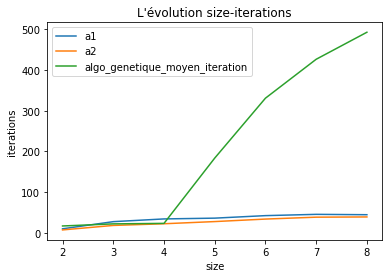

In [9]:
n_range=[i for i in range(2,9)]
plt.plot(n_range,list_iter1, label="a1")
plt.plot(n_range,list_iter2, label="a2")
plt.plot(n_range,list_iter, label="algo_genetique_moyen_iteration")
plt.title("L'évolution size-iterations")
plt.xlabel("size")
plt.ylabel("iterations")
plt.legend()
plt.show()

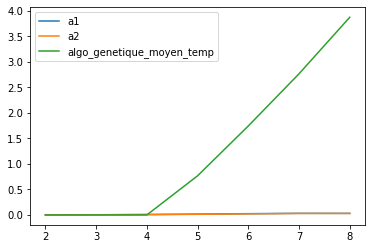

In [10]:
n_range=[i for i in range(2,9)]
plt.plot(n_range,list_t1, label="a1")
plt.plot(n_range,list_t2, label="a2")
plt.plot(n_range,list_tt, label="algo_genetique_moyen_temp")
plt.legend()
plt.show()